In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline

/Users/aklopack/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
import os
os.getcwd() 

'/Users/aklopack/Documents/911_new'

In [3]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '2016 911 calls.jpg',
 '2016 and 2017 911 calls.csv',
 '2016 data.csv',
 '2016 Traffic and alcohol related 911 calls.jpg',
 '2016 Traffic related 911 calls.jpg',
 'Alexs-Doc-Monday-the-6th.ipynb',
 'heatmap_normalized.png',
 'Initial Visualization.ipynb',
 'precipitation_narcotics_title.png',
 'README.md',
 'Untitled.ipynb',
 'weather data.csv']

# Load csv into Pandas DataFrame

call_data_2016: All of the 911 call data from the year 2016

weater_data: All of the Seattle weather data from 2011 to 2016

In [4]:
call_data_2016 = pd.read_csv('2016 data.csv')

#call_data_2016

In [5]:
weather_data = pd.read_csv('weather data.csv')

#weather_data

#### weather_condition

To be used with later functions. Sets up the different weather conditions that we can plot against 911 data. 

In [6]:
### weather conditions (2016 only!!!)

precip = np.array(weather_data.ix[1665:2048, 4])
temp_max = np.array(weather_data.ix[1665:2048, 8])
temp_min = np.array(weather_data.ix[1665:2048, 9])

In [7]:
## how to make an average_temp weather condition, where each item in the array is column 8 and 9 averaged together

average_temp = np.zeros(len(weather_data.ix[1665:2048, 8]))

for day in range(len(weather_data.ix[1665:2048, 8])): 
    avg = (weather_data.ix[1665+day, 8] + weather_data.ix[1665+day, 9])/2
    average_temp[day] = avg

#average_temp

#### crime_condition

To be used with later functions. Lists all the possible call types to be analyzed and differentiated. 

*Most general classification of calls in the data. Other listings for groups are more specific and include subgroupings.*

In [8]:
## for 2016 strictly

event_clearance_groups = call_data_2016.ix[:,2].unique()
#event_clearance_groups

# Code to create an array of counts for *all* calls

In [9]:
## For 2016

starting_date = '1/1/16' 
all_calls = [] 
counter = 0

for i in range(len(call_data_2016.index)):    
    if call_data_2016.ix[i, 4] == starting_date:         
        counter += 1
    else:     
        all_calls.append(counter)     
        starting_date = call_data_2016.ix[i, 4]
        counter = 0
    
#print(all_calls)

### Narcotics Test Run

In [12]:
# For 2016

date = '1/1/16' 
day_data = [] 
narc = 0

for i in range(len(call_data_2016.index)):    
    if call_data_2016.ix[i, 4] == date:         
        # print('found date')        
        if call_data_2016.ix[i, 2] == 'NARCOTICS COMPLAINTS':             
            narc = narc + 1            
            # print('narcotics event')   
    else:     
        #print(date) 
        #print(narc)
        day_data.append(narc)     
        date = call_data_2016.ix[i, 4]
        narc = 0
        
        # print(narc)
    
#print(day_data)

In [13]:
len(day_data)

364

In [14]:
#weather_data.ix[1665:2075, :]

In [ ]:
#fig = plt.figure(figsize = (12,4))

#plt.plot(precip, 'blue', label='Precipitation')
#plt.plot(day_data, 'green', label='Narcotics Complaints')
#plt.legend()
#plt.xlim(0, 365)
#plt.ylim(0, 35)
#plt.xlabel('Day of the Year')
#plt.ylabel('Number of Narcotics Calls')
#plt.ylabel

fig2, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(precip, 'b')
ax1.set_xlabel('Day of the Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Precipitation', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(day_data, 'g')
ax2.set_ylabel('Number of Narcotics Calls', color='g')
ax2.tick_params('y', colors='g')

plt.xlim(0, len(day_data))
plt.title('Precipitation vs. Number of Narcotics 911 Calls in 2016')
plt.show()
fig2.savefig('precipitation_narcotics_title.png')

In [ ]:
plt.hist(day_data, bins=10, color='orange')
plt.xlabel('Number of Narcotics Complaints Made')
plt.ylabel('Frequency')
plt.title('Frequency of Narcotics Calls Per Day in 2016')

plt.show()
#plt.savefig('freq_narcotics___.png')

## Defining functions for graphing and call type arrays

call_type_freq() will return a list of 365, each entry represents a day of the year. Each value represents the number of calls made on that day of each type. 

In [10]:
def call_type_freq(start_date, event_clearance_group):

    daylist = [] 
    count = 0

    for i in range(len(call_data_2016.index)):
        if call_data_2016.ix[i, 4] == start_date:                
            if call_data_2016.ix[i, 2] == event_clearance_group:             
                count = count + 1            
        else:
            daylist.append(count)
            start_date = call_data_2016.ix[i, 4]
            count = 0
    return daylist


In [11]:
#burglary = call_type_freq('1/1/16', 'BURGLARY')

In [12]:
#burglary

plot_two_sided() will return a double y-axis plot of a weather condition (defined above as precipitation, maximum temperature, minimum temperature, and average temperature) and a 911 call type (defined and created above by the call_type_freq() function) versus the day of the year (2016).

In [13]:
def plot_two_sided(weather_condition, weather_label, crime_condition, crime_label, title):

    fig, ax1 = plt.subplots(figsize=(12,4))
    ax1.plot(weather_condition, 'RoyalBlue', alpha=0.8)
    ax1.set_xlabel('Day of the Year')
    ax1.set_ylabel(weather_label, color='RoyalBlue')
    ax1.tick_params('y', colors='RoyalBlue')

    ax2 = ax1.twinx()
    ax2.plot(crime_condition, 'Maroon', alpha=0.8)
    ax2.set_ylabel(crime_label, color='Maroon')
    ax2.tick_params('y', colors='Maroon')
    
    plt.xlim(0, len(crime_condition))
    plt.title(title)
    plt.show()

#plot_two_sided(precip, 'Precipitation', burglary, 'Burglaries', 'Burglaries vs. Precipitation, 2016')

## Testing Different Call Types and Weather Patterns

just tryin things out

In [14]:
#public_gatherings = call_type_freq('1/1/16','PUBLIC GATHERINGS')

#plot_two_sided(precip, 'Precipitation', public_gatherings, 'Public Gatherings', 
#               'Public Gatherings vs. Precipitation, 2016')

In [15]:
#plot_two_sided(temp_max, 'Maximum Temperature', public_gatherings, 'Public Gatherings', 
#               'Number of Public Gatherings and Maximum Temperature, 2016')

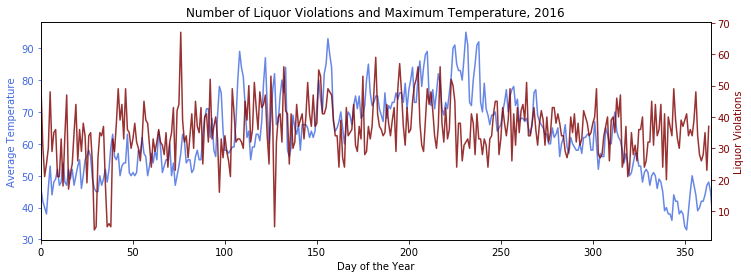

In [16]:
liquor_violations = call_type_freq('1/1/16','LIQUOR VIOLATIONS')

plot_two_sided(temp_max, 'Average Temperature', liquor_violations, 'Liquor Violations', 
               'Number of Liquor Violations and Maximum Temperature, 2016')

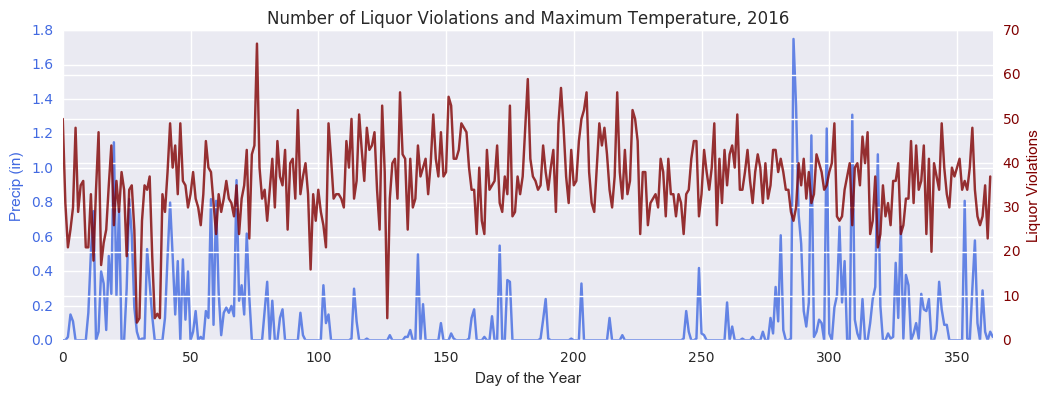

In [252]:
plot_two_sided(precip, 'Precip (in)', liquor_violations, 'Liquor Violations', 
               'Number of Liquor Violations and Maximum Temperature, 2016')

# All types of calls versus temperature and precipitation

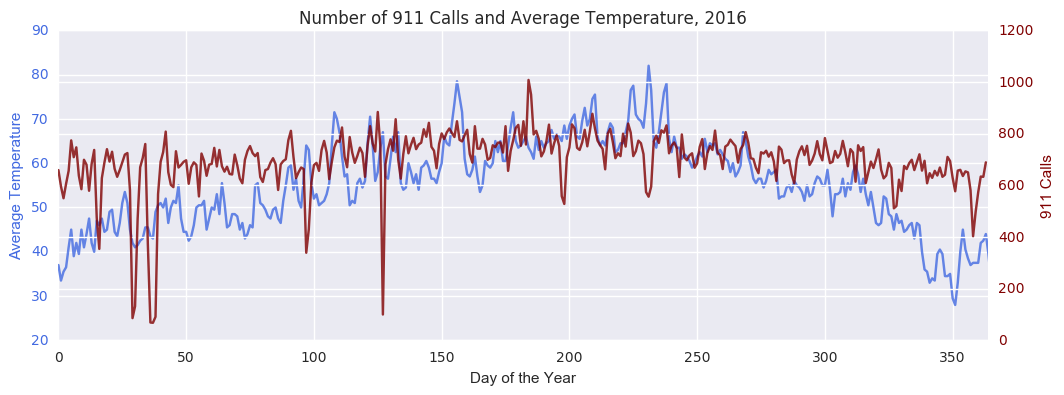

In [251]:
fig = plot_two_sided(average_temp, 'Average Temperature', all_calls, '911 Calls', 
               'Number of 911 Calls and Average Temperature, 2016')


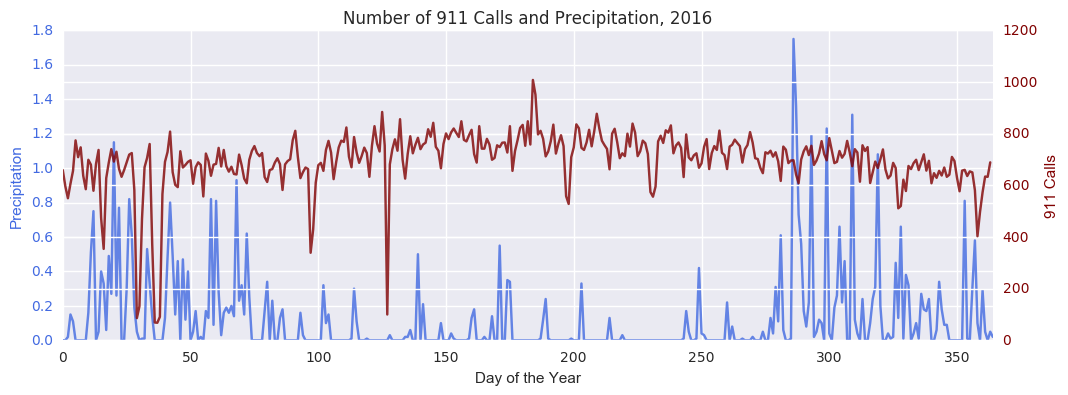

In [249]:
plot_two_sided(precip, 'Precipitation', all_calls, '911 Calls', 
               'Number of 911 Calls and Precipitation, 2016')

# Statistics

What do we want to do about the statistics issue? How do we compare two plotted lines to see how significant these results are? Have to figure out if this is important or just some coincidence

# Working on sorting by time

call_time_freq() is a function 

In [17]:
def call_time_freq(start_date):
    
    hourlist = np.zeros(24)  
    count = 0
    time = '0:00'

    for i in range(len(call_data_2016.index)):
        
        import time
        time = time.strptime(call_data_2016.ix[i, 5], '%H:%M').tm_hour
        current = hourlist[time]
        hourlist[time] = current + 1
        
    return hourlist

In [18]:
print(call_data_2016.ix[1, 5])

import time

time = time.strptime(call_data_2016.ix[1, 5], '%H:%M')
time.tm_hour

0:02


0

In [19]:
import time 

time.strptime(call_data_2016.ix[1, 5], '%H:%M').tm_hour

0

In [20]:
call_time = call_time_freq('1/1/16')

In [21]:
call_time

array([ 10953.,   9892.,   8187.,   8823.,   6636.,   4694.,   4296.,
         6192.,   7814.,   8572.,   9057.,  12187.,  12269.,  12991.,
        12497.,  12368.,  13132.,  12919.,  11969.,  16369.,  14088.,
        13193.,  13191.,  12317.])

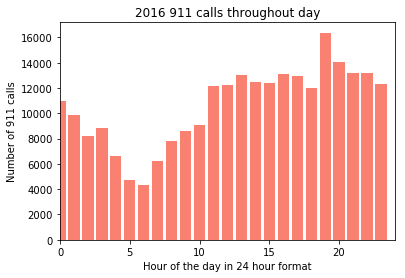

In [22]:
ind = np.arange(24)

plt.bar(ind, call_time, color = 'Salmon')

plt.ylabel('Number of 911 calls')
plt.xlabel('Hour of the day in 24 hour format')
plt.title('2016 911 calls throughout day')
plt.xlim(0, 24)

plt.savefig('2016 911 calls.jpg')

In [23]:
def call_time_freq_defined(start_date, refine):

    hourlist = np.zeros(24)  
    count = 0
    time = '0:00'

    for i in range(len(call_data_2016.index)):
        
        if call_data_2016.ix[i, 2] == refine:         
        
            import time
            time = time.strptime(call_data_2016.ix[i, 5], '%H:%M').tm_hour
            current = hourlist[time]
            hourlist[time] = current + 1
        
    return hourlist 

In [22]:
traffic_calls = call_time_freq_defined('1/1/16', 'TRAFFIC RELATED CALLS')

In [ ]:
traffic_calls

In [23]:
liquor_calls = call_time_freq_defined('1/1/16', 'LIQUOR VIOLATIONS')

In [ ]:
liquor_calls

In [24]:
ind = np.arange(24)

width = 0.35 

a = plt.bar(ind, traffic_calls, width, color = 'Red', alpha=0.6, label = 'Traffic calls')
b = plt.bar(ind + width, liquor_calls, width, color = 'Blue', alpha=0.6, label = 'Liquor calls')
plt.ylabel('Number of 911 calls')
plt.xlabel('Hour of the day in 24 hour format')
plt.title('2016 Traffic related calls throughout day')
plt.xlim(0, 24)

plt.legend((a[0], b[0]), ('Traffic calls', 'Liquor calls'))

plt.savefig('2016 Traffic and alcohol related 911 calls.jpg')

plt.show()



NameError: name 'traffic_calls' is not defined

In [28]:
print(event_clearance_groups)

['TRAFFIC RELATED CALLS' 'SUSPICIOUS CIRCUMSTANCES' 'DISTURBANCES'
 'THREATS, HARASSMENT' 'ANIMAL COMPLAINTS' 'NUISANCE, MISCHIEF'
 'FALSE ALACAD' 'NARCOTICS COMPLAINTS' 'BURGLARY' 'FRAUD CALLS' 'ASSAULTS'
 'MOTOR VEHICLE COLLISION INVESTIGATION' 'LIQUOR VIOLATIONS' 'ARREST'
 'BEHAVIORAL HEALTH' 'HAZARDS' 'OTHER PROPERTY' 'TRESPASS' 'WEAPONS CALLS'
 'PROPERTY - MISSING, FOUND' 'ROBBERY' 'PERSON DOWN/INJURY'
 'PROPERTY DAMAGE' 'PUBLIC GATHERINGS' 'CAR PROWL' 'SHOPLIFTING'
 'AUTO THEFTS' 'BIKE' 'PERSONS - LOST, FOUND, MISSING'
 'MISCELLANEOUS MISDEMEANORS' 'LEWD CONDUCT' 'PROWLER' 'HARBOR CALLS'
 'OTHER VICE' 'PROSTITUTION' 'DRIVE BY (NO INJURY)' 'HOMICIDE'
 'FAILURE TO REGISTER (SEX OFFENDER)' 'RECKLESS BURNING' 'VICE CALLS']


# Heat Mapping

The goal of this heatmap is to visualize when the most calls of different types are taking place. 

In [25]:
import seaborn as sns
sns.set()

In [26]:
heatdata = []
for i in range(40):
    heatdata.append(call_time_freq_defined('1/1/16', event_clearance_groups[i]))
print(heatdata)

[array([ 1418.,  1198.,  1046.,   864.,   844.,   773.,   884.,  1780.,
        2470.,  2466.,  2372.,  2413.,  2446.,  2502.,  2300.,  2277.,
        2290.,  2166.,  1943.,  2010.,  2116.,  2158.,  2115.,  1724.]), array([ 1817.,  1727.,  1399.,  1486.,  1322.,   899.,   672.,   747.,
         893.,   932.,   894.,  1123.,  1680.,  1692.,  1501.,  1498.,
        1598.,  1561.,  1408.,  1995.,  2254.,  2036.,  2090.,  1985.]), array([ 2524.,  2375.,  2040.,  1903.,  1470.,   796.,   641.,   696.,
         708.,   723.,   693.,  1072.,  1333.,  1235.,  1299.,  1354.,
        1417.,  1450.,  1282.,  1979.,  2109.,  1998.,  2165.,  2470.]), array([ 110.,  102.,   77.,  101.,   48.,   31.,   21.,   29.,   27.,
         54.,   64.,  135.,   99.,  129.,  135.,  147.,  166.,  140.,
        154.,  279.,  132.,  129.,  128.,  121.]), array([ 35.,  25.,  21.,  19.,  20.,  16.,   7.,   9.,  19.,  26.,  12.,
        15.,  22.,  19.,  19.,  28.,  34.,  20.,  16.,  44.,  66.,  60.,
        51.,  43.

In [27]:
## can we set up a pandas dataframe that has each hour, and then a count for each type of call? 

hour_df = pd.DataFrame(heatdata)
hour_df.index = event_clearance_groups
#hour_df

#### Prepping the data for heatmapping

I used this project as a reference in figuring out how to "prep" the data to make the heatmap: 

https://github.com/cmenguy/crime-analytics/blob/master/crime-analytics.ipynb

This was because the raw data of the call counts for each hour are extremely variable. This makes it hard to visualize with a heatmap because they generally fall into extremes. Especially because some call types, like traffic incidents, are way more common than others, like homicides. 

To prepare the data, I divided each value by the maximum value for the row. This normalizes the values and results in a dataframe with all values between 0 and 1. The result of this prep was a heatmap with comparable values, even for low frequency call types. 

In [28]:
# prep data in hour_df into new df --> heat_prep_df
# divide all data in rows by the max value of the row
# will spit out dataframe with all values between 0 and 1

heat_prep_df = hour_df
m = hour_df.values.max(axis=1)

for row in range(40):
    
    for col in range(24):
        heat_prep_df.iloc[row, col] = hour_df.ix[row, col]/m[row]

#heat_prep_df

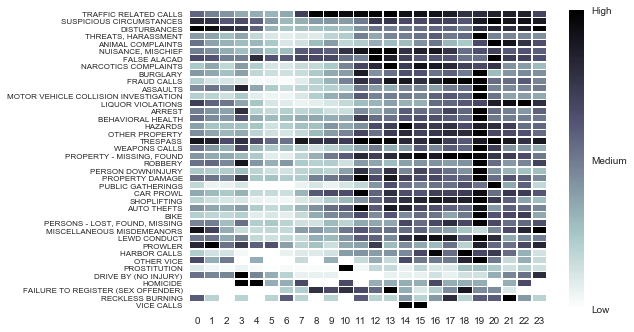

In [29]:
ax = sns.heatmap(heat_prep_df.ix[:, :39], linewidths=0.5, cmap='bone_r') # builds heatmap

for label in ax.get_yticklabels():
    label.set_size(8)  # makes the text labels a little bit smaller --> easier to read

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .5, 1])
cbar.set_ticklabels(['Low', 'Medium', 'High']) # sets the colorbar labels and locations
    
fig = ax.get_figure() 
fig.savefig("heatmap_normalized.png") 

# Mapping
city of seattle, divided by neighborhoods. 

neighborhood data .shp files were taken from: 

https://data.seattle.gov/dataset/data-seattle-gov-GIS-shapefile-datasets/f7tb-rnup

Inspiration and code adapted from the previous project listed under the heatmapping portion: 

https://github.com/cmenguy/crime-analytics/blob/master/crime-analytics.ipynb

and this project that maps location data in seattle: 

http://beneathdata.com/how-to/visualizing-my-location-history/

In [30]:
import fiona

shp = fiona.open('Downloads/Neighborhoods/WGS84/Neighborhoods.shp')

ModuleNotFoundError: No module named 'fiona'